# Импорт библиотек

In [2]:
from moexalgo import Market, Ticker

# Загрузка истории

In [45]:
def get_history(ticker, date):
    sber = Ticker(ticker)
    day_cnd_df = sber.tradestats(date=date, till_date=date)
    day_cnd_df.to_pickle(f"../data/raw/{date.replace('-','')}_{ticker}.pkl")

In [57]:
from datetime import date, timedelta
import time

ticker='YNDX'

start_date = date(2023, 1, 1)
end_date = date(2023, 12, 1)

while start_date <= end_date:
    date = start_date.strftime("%Y-%m-%d")
    print(date)
    get_history(ticker, date)
    start_date += timedelta(days=1)
    time.sleep(3)

2023-01-01
2023-01-02
2023-01-03
2023-01-04
2023-01-05
2023-01-06
2023-01-07
2023-01-08
2023-01-09
2023-01-10
2023-01-11
2023-01-12
2023-01-13
2023-01-14
2023-01-15
2023-01-16
2023-01-17
2023-01-18
2023-01-19
2023-01-20
2023-01-21
2023-01-22
2023-01-23
2023-01-24
2023-01-25
2023-01-26
2023-01-27
2023-01-28
2023-01-29
2023-01-30
2023-01-31
2023-02-01
2023-02-02
2023-02-03
2023-02-04
2023-02-05
2023-02-06
2023-02-07
2023-02-08
2023-02-09
2023-02-10
2023-02-11
2023-02-12
2023-02-13
2023-02-14
2023-02-15
2023-02-16
2023-02-17
2023-02-18
2023-02-19
2023-02-20
2023-02-21
2023-02-22
2023-02-23
2023-02-24
2023-02-25
2023-02-26
2023-02-27
2023-02-28
2023-03-01
2023-03-02
2023-03-03
2023-03-04
2023-03-05
2023-03-06
2023-03-07
2023-03-08
2023-03-09
2023-03-10
2023-03-11
2023-03-12
2023-03-13
2023-03-14
2023-03-15
2023-03-16
2023-03-17
2023-03-18
2023-03-19
2023-03-20
2023-03-21
2023-03-22
2023-03-23
2023-03-24
2023-03-25
2023-03-26
2023-03-27
2023-03-28
2023-03-29
2023-03-30
2023-03-31
2023-04-01

## Ежедневные загрузки

In [59]:
from datetime import datetime

date=datetime.today().strftime('%Y-%m-%d')
ticker='YNDX'
#get_history(ticker, date)

# Обучение

In [95]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import glob
import os

In [125]:
all_files = glob.glob("../data/raw/*.pkl")

df = []
for filename in all_files:
    tdf = pd.read_pickle(filename)
    df.append(tdf)

df = pd.concat(df, axis=0, ignore_index=True)
df['pr_mean'] = df[['pr_high','pr_low']].mean(axis=1)

df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,trades_s,val_b,val_s,vol_b,vol_s,disb,pr_vwap_b,pr_vwap_s,systime,pr_mean
0,YNDX,2023-01-03,10:05:00,1817.2,1830.0,1817.0,1822.4,0.0005,3586,6543004.0,...,63,4477160.0,2065844.0,2453,1133,0.37,1825.2,1823.3,2023-10-27 00:31:40,1823.5
1,YNDX,2023-01-03,10:10:00,1824.0,1830.0,1822.6,1824.8,0.0003,2426,4434429.0,...,47,2505360.0,1929068.0,1370,1056,0.13,1828.7,1826.8,2023-10-27 00:31:41,1826.3
2,YNDX,2023-01-03,10:15:00,1825.0,1826.8,1822.6,1826.8,0.0003,548,999672.0,...,27,695113.0,304559.0,381,167,0.39,1824.4,1823.7,2023-10-27 00:31:42,1824.7
3,YNDX,2023-01-03,10:20:00,1825.6,1833.6,1825.6,1829.4,0.0002,2585,4730644.0,...,77,2872988.0,1857655.0,1570,1015,0.21,1829.9,1830.2,2023-10-27 00:31:43,1829.6
4,YNDX,2023-01-03,10:25:00,1827.8,1829.0,1811.2,1816.6,0.0003,11584,21070462.0,...,308,4913530.0,16156931.0,2699,8885,-0.53,1820.5,1818.5,2023-10-27 00:31:43,1820.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24121,YNDX,2023-12-01,18:20:00,2441.2,2448.4,2437.2,2440.8,0.0003,16780,40974754.0,...,326,20593316.0,20381438.0,8433,8347,0.01,2442.0,2441.8,2023-12-01 18:20:10,2442.8
24122,YNDX,2023-12-01,18:25:00,2441.2,2448.0,2435.2,2435.4,0.0004,32395,79114293.0,...,413,40138964.0,38975328.0,16437,15958,0.01,2442.0,2442.4,2023-12-01 18:25:10,2441.6
24123,YNDX,2023-12-01,18:30:00,2435.4,2439.4,2427.0,2431.6,0.0003,28797,70058852.0,...,668,33627778.0,36431074.0,13823,14974,-0.04,2432.7,2433.0,2023-12-01 18:30:10,2433.2
24124,YNDX,2023-12-01,18:35:00,2431.6,2435.0,2422.2,2428.2,0.0004,38289,92961344.0,...,604,48653638.0,44307706.0,20042,18247,0.05,2427.6,2428.2,2023-12-01 18:35:10,2428.6


In [126]:
dist=5

peaks, _ = find_peaks(df['pr_mean'], distance=dist)
temp = pd.DataFrame(index=peaks)
temp['peak'] = 1
df = df.join(temp)
df['peak'] = df['peak'].fillna(0).astype(int)


peaks, _ = find_peaks(0 - df['pr_mean'], distance=dist)
temp = pd.DataFrame(index=peaks)
temp['trough'] = 1
df = df.join(temp)
df['trough'] = df['trough'].fillna(0).astype(int)

In [127]:
df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,val_s,vol_b,vol_s,disb,pr_vwap_b,pr_vwap_s,systime,pr_mean,peak,trough
0,YNDX,2023-01-03,10:05:00,1817.2,1830.0,1817.0,1822.4,0.0005,3586,6543004.0,...,2065844.0,2453,1133,0.37,1825.2,1823.3,2023-10-27 00:31:40,1823.5,0,0
1,YNDX,2023-01-03,10:10:00,1824.0,1830.0,1822.6,1824.8,0.0003,2426,4434429.0,...,1929068.0,1370,1056,0.13,1828.7,1826.8,2023-10-27 00:31:41,1826.3,0,0
2,YNDX,2023-01-03,10:15:00,1825.0,1826.8,1822.6,1826.8,0.0003,548,999672.0,...,304559.0,381,167,0.39,1824.4,1823.7,2023-10-27 00:31:42,1824.7,0,0
3,YNDX,2023-01-03,10:20:00,1825.6,1833.6,1825.6,1829.4,0.0002,2585,4730644.0,...,1857655.0,1570,1015,0.21,1829.9,1830.2,2023-10-27 00:31:43,1829.6,1,0
4,YNDX,2023-01-03,10:25:00,1827.8,1829.0,1811.2,1816.6,0.0003,11584,21070462.0,...,16156931.0,2699,8885,-0.53,1820.5,1818.5,2023-10-27 00:31:43,1820.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24121,YNDX,2023-12-01,18:20:00,2441.2,2448.4,2437.2,2440.8,0.0003,16780,40974754.0,...,20381438.0,8433,8347,0.01,2442.0,2441.8,2023-12-01 18:20:10,2442.8,1,0
24122,YNDX,2023-12-01,18:25:00,2441.2,2448.0,2435.2,2435.4,0.0004,32395,79114293.0,...,38975328.0,16437,15958,0.01,2442.0,2442.4,2023-12-01 18:25:10,2441.6,0,0
24123,YNDX,2023-12-01,18:30:00,2435.4,2439.4,2427.0,2431.6,0.0003,28797,70058852.0,...,36431074.0,13823,14974,-0.04,2432.7,2433.0,2023-12-01 18:30:10,2433.2,0,0
24124,YNDX,2023-12-01,18:35:00,2431.6,2435.0,2422.2,2428.2,0.0004,38289,92961344.0,...,44307706.0,20042,18247,0.05,2427.6,2428.2,2023-12-01 18:35:10,2428.6,0,1


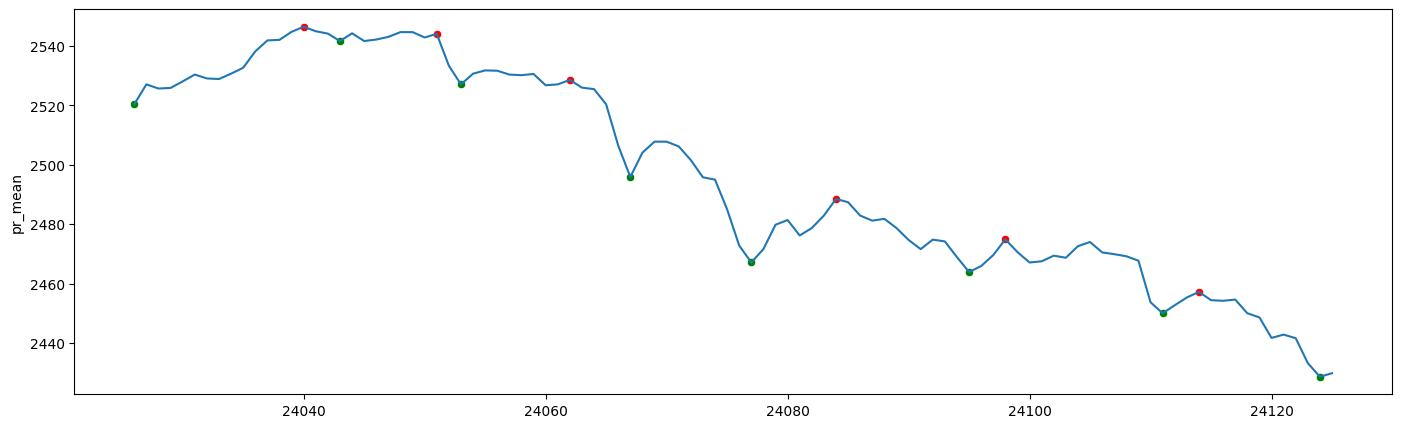

In [124]:
temp = df[['pr_mean','peak','trough']][-100:]
plt.figure(figsize=(17,5))
sns.lineplot(temp['pr_mean']);
sns.scatterplot(temp.query('peak == 1')['pr_mean'], color='r');
sns.scatterplot(temp.query('trough == 1')['pr_mean'], color='g');